In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn


In [14]:
dataFrame = pd.read_excel("merc.xlsx")

In [15]:
dataFrame

,year,price,transmission,mileage,tax,mpg,engineSize
0,2005,5200,Automatic,63000,325,32.1,1.8
1,2017,34948,Automatic,27000,20,61.4,2.1
2,2016,49948,Automatic,6200,555,28.0,5.5
3,2016,61948,Automatic,16000,325,30.4,4.0
4,2016,73948,Automatic,4000,325,30.1,4.0
...,...,...,...,...,...,...,...
13114,2020,35999,Automatic,500,145,55.4,2.0
13115,2020,24699,Automatic,2500,145,55.4,2.0
13116,2019,30999,Automatic,11612,145,41.5,2.1
13117,2019,37990,Automatic,2426,145,45.6,2.0


In [16]:
dataFrame = dataFrame.drop("transmission",axis=1)

In [17]:
dataFrame

,year,price,mileage,tax,mpg,engineSize
0,2005,5200,63000,325,32.1,1.8
1,2017,34948,27000,20,61.4,2.1
2,2016,49948,6200,555,28.0,5.5
3,2016,61948,16000,325,30.4,4.0
4,2016,73948,4000,325,30.1,4.0
...,...,...,...,...,...,...
13114,2020,35999,500,145,55.4,2.0
13115,2020,24699,2500,145,55.4,2.0
13116,2019,30999,11612,145,41.5,2.1
13117,2019,37990,2426,145,45.6,2.0


In [21]:
dataFrame2 = dataFrame.sort_values("price",ascending=(False)).iloc[131:]

In [23]:
dataFrame = dataFrame2

In [24]:
dataFrame

,year,price,mileage,tax,mpg,engineSize
6177,2019,65990,5076,150,30.4,3.0
5779,2020,65990,999,145,28.0,4.0
3191,2020,65980,3999,145,28.0,4.0
4727,2019,65000,3398,145,27.2,4.0
8814,2019,64999,119,145,40.9,3.0
...,...,...,...,...,...,...
11549,2002,1495,13800,305,39.8,2.7
12594,2004,1495,119000,300,34.5,1.8
11765,2000,1490,87000,265,27.2,3.2
12008,2010,1350,116126,145,54.3,2.0


In [25]:
dataFrame.describe()

,year,price,mileage,tax,mpg,engineSize
count,12988.000000,12988.000000,12988.000000,12988.000000,12988.000000,12988.000000
mean,2017.281876,24074.926933,22132.741146,129.689714,55.437142,2.050901
std,2.228515,9866.224575,21196.776401,65.183076,15.025999,0.532596
min,1970.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17357.500000,6322.000000,125.000000,45.600000,1.675000
50%,2018.000000,22299.000000,15369.500000,145.000000,56.500000,2.000000
75%,2019.000000,28706.000000,31982.250000,145.000000,64.200000,2.100000
max,2020.000000,65990.000000,259000.000000,580.000000,217.300000,6.200000


C:\Users\tosun\anaconda3\envs\myenv\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

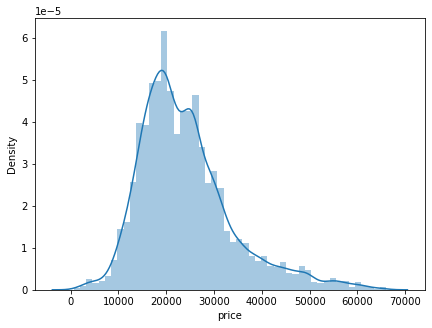

In [31]:
plt.figure(figsize=(7,5))
sbn.distplot(dataFrame["price"])

In [32]:
dataFrame = dataFrame[dataFrame.year !=1970]

In [33]:
dataFrame

,year,price,mileage,tax,mpg,engineSize
6177,2019,65990,5076,150,30.4,3.0
5779,2020,65990,999,145,28.0,4.0
3191,2020,65980,3999,145,28.0,4.0
4727,2019,65000,3398,145,27.2,4.0
8814,2019,64999,119,145,40.9,3.0
...,...,...,...,...,...,...
11549,2002,1495,13800,305,39.8,2.7
12594,2004,1495,119000,300,34.5,1.8
11765,2000,1490,87000,265,27.2,3.2
12008,2010,1350,116126,145,54.3,2.0


In [34]:
y= dataFrame["price"].values
x= dataFrame.drop("price",axis=1).values

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
x_train, x_test , y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=15)

In [37]:
len(x_train)

9090

In [39]:
len(x_test)

3897

In [40]:
from sklearn.preprocessing import MinMaxScaler

In [41]:
scaler = MinMaxScaler()

In [42]:
x_train = scaler.fit_transform(x_train)

In [43]:
x_test = scaler.transform(x_test)

In [45]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [46]:
model = Sequential()

model.add(Dense(14,activation="relu"))
model.add(Dense(14,activation="relu"))
model.add(Dense(14,activation="relu"))
model.add(Dense(14,activation="relu"))

model.add(Dense(1))

model.compile(optimizer="adam",loss="mse")

In [47]:
model.fit(x=x_train, y = y_train,validation_data=(x_test,y_test),batch_size=300,epochs=320)

Epoch 1/320
31/31 [==============================] - 0s 15ms/step - loss: 673450304.0000 - val_loss: 685041280.0000
Epoch 2/320
31/31 [==============================] - 0s 6ms/step - loss: 673420672.0000 - val_loss: 684993024.0000
Epoch 3/320
31/31 [==============================] - 0s 6ms/step - loss: 673337792.0000 - val_loss: 684853248.0000
Epoch 4/320
31/31 [==============================] - 0s 7ms/step - loss: 673103232.0000 - val_loss: 684456192.0000
Epoch 5/320
31/31 [==============================] - 0s 6ms/step - loss: 672413952.0000 - val_loss: 683291712.0000
Epoch 6/320
31/31 [==============================] - 0s 6ms/step - loss: 670513408.0000 - val_loss: 680272384.0000
Epoch 7/320
31/31 [==============================] - 0s 5ms/step - loss: 665969664.0000 - val_loss: 673503040.0000
Epoch 8/320
31/31 [==============================] - 0s 7ms/step - loss: 656449984.0000 - val_loss: 660150080.0000
Epoch 9/320
31/31 [==============================] - 0s 7ms/step - loss: 638654

31/31 [==============================] - 0s 3ms/step - loss: 62752768.0000 - val_loss: 64936460.0000
Epoch 73/320
31/31 [==============================] - 0s 3ms/step - loss: 62227636.0000 - val_loss: 64383612.0000
Epoch 74/320
31/31 [==============================] - 0s 3ms/step - loss: 61684076.0000 - val_loss: 63857128.0000
Epoch 75/320
31/31 [==============================] - 0s 3ms/step - loss: 61150568.0000 - val_loss: 63332804.0000
Epoch 76/320
31/31 [==============================] - 0s 3ms/step - loss: 60597636.0000 - val_loss: 62767132.0000
Epoch 77/320
31/31 [==============================] - 0s 4ms/step - loss: 60027864.0000 - val_loss: 62216992.0000
Epoch 78/320
31/31 [==============================] - 0s 5ms/step - loss: 59462420.0000 - val_loss: 61637424.0000
Epoch 79/320
31/31 [==============================] - 0s 4ms/step - loss: 58885676.0000 - val_loss: 61080008.0000
Epoch 80/320
31/31 [==============================] - 0s 4ms/step - loss: 58299308.0000 - val_loss: 6

31/31 [==============================] - 0s 3ms/step - loss: 23124962.0000 - val_loss: 24400480.0000
Epoch 144/320
31/31 [==============================] - 0s 3ms/step - loss: 22967254.0000 - val_loss: 24221426.0000
Epoch 145/320
31/31 [==============================] - 0s 3ms/step - loss: 22803742.0000 - val_loss: 24059350.0000
Epoch 146/320
31/31 [==============================] - 0s 3ms/step - loss: 22663752.0000 - val_loss: 23913056.0000
Epoch 147/320
31/31 [==============================] - 0s 3ms/step - loss: 22517082.0000 - val_loss: 23804238.0000
Epoch 148/320
31/31 [==============================] - 0s 3ms/step - loss: 22419128.0000 - val_loss: 23655402.0000
Epoch 149/320
31/31 [==============================] - 0s 3ms/step - loss: 22289308.0000 - val_loss: 23575072.0000
Epoch 150/320
31/31 [==============================] - 0s 3ms/step - loss: 22223550.0000 - val_loss: 23521850.0000
Epoch 151/320
31/31 [==============================] - 0s 3ms/step - loss: 22119776.0000 - val

31/31 [==============================] - 0s 3ms/step - loss: 19959968.0000 - val_loss: 21100226.0000
Epoch 215/320
31/31 [==============================] - 0s 3ms/step - loss: 19952932.0000 - val_loss: 21107010.0000
Epoch 216/320
31/31 [==============================] - 0s 3ms/step - loss: 19963622.0000 - val_loss: 21082562.0000
Epoch 217/320
31/31 [==============================] - 0s 3ms/step - loss: 19946456.0000 - val_loss: 21074420.0000
Epoch 218/320
31/31 [==============================] - 0s 3ms/step - loss: 19937978.0000 - val_loss: 20968736.0000
Epoch 219/320
31/31 [==============================] - 0s 2ms/step - loss: 19880714.0000 - val_loss: 21017062.0000
Epoch 220/320
31/31 [==============================] - 0s 3ms/step - loss: 19848928.0000 - val_loss: 21012680.0000
Epoch 221/320
31/31 [==============================] - 0s 3ms/step - loss: 19847182.0000 - val_loss: 20987616.0000
Epoch 222/320
31/31 [==============================] - 0s 3ms/step - loss: 19825328.0000 - val

31/31 [==============================] - 0s 3ms/step - loss: 19016160.0000 - val_loss: 19949438.0000
Epoch 286/320
31/31 [==============================] - 0s 3ms/step - loss: 19000618.0000 - val_loss: 19937802.0000
Epoch 287/320
31/31 [==============================] - 0s 3ms/step - loss: 19004538.0000 - val_loss: 19907250.0000
Epoch 288/320
31/31 [==============================] - 0s 3ms/step - loss: 18983858.0000 - val_loss: 19885212.0000
Epoch 289/320
31/31 [==============================] - 0s 3ms/step - loss: 18963222.0000 - val_loss: 19869354.0000
Epoch 290/320
31/31 [==============================] - 0s 3ms/step - loss: 18980034.0000 - val_loss: 19906192.0000
Epoch 291/320
31/31 [==============================] - 0s 3ms/step - loss: 18990848.0000 - val_loss: 19913626.0000
Epoch 292/320
31/31 [==============================] - 0s 3ms/step - loss: 18941972.0000 - val_loss: 19880202.0000
Epoch 293/320
31/31 [==============================] - 0s 3ms/step - loss: 18924922.0000 - val

In [48]:
kayipverisi= pd.DataFrame(model.history.history)

<AxesSubplot:>

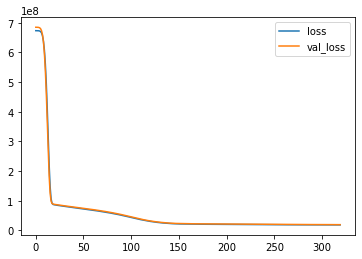

In [54]:
kayipverisi.plot() 

In [57]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [58]:
tahminDizisi = model.predict(x_test)

In [59]:
tahminDizisi

array([[13705.829],
       [43554.773],
       [17140.467],
       ...,
       [31866.459],
       [28808.1  ],
       [19610.37 ]], dtype=float32)

In [60]:
mean_absolute_error(y_test,tahminDizisi)

3173.629288404943